In [12]:
import numpy as np

temp_max = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
temp_min = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])

import matplotlib.pyplot as plt
months = np.arange(12)
#plt.plot(months, temp_max, 'go')
#plt.plot(months, temp_min, 'co')
#plt.xlabel('Month')
#plt.ylabel('Min and max temperature')

In [13]:
#1. fitting it to the periodic function

from scipy import optimize
def yearly_temps(times, avg, ampl, time_offset):
    return (avg
            + ampl * np.cos((times + time_offset) * 1.8 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, months,
                                      temp_max, [40, 20, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, months,
                                      temp_min, [-40, 20, 0])

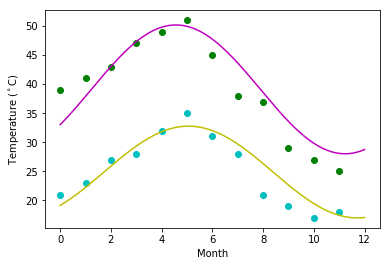

In [14]:
#2. plot the fit

days = np.linspace(0, 12, num=365)

plt.figure()
plt.plot(months, temp_max, 'go')
plt.plot(days, yearly_temps(days, *res_max), 'm-')
plt.plot(months, temp_min, 'co')
plt.plot(days, yearly_temps(days, *res_min), 'y-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

plt.show()

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
titanic = pd.read_csv("https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv")

In [3]:
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


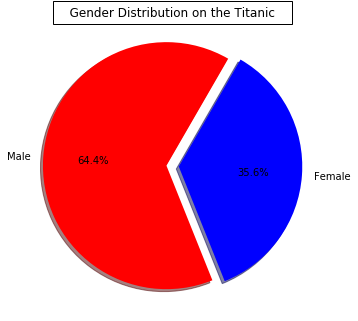

In [9]:
#Create a pie chart presenting the male/female proportion

import matplotlib.pyplot as plt
gender_data = titanic['sex'].value_counts()
gender_data = gender_data.astype(float)
fig = plt.figure(figsize=(8,4))
ax = fig.add_axes((0,0,0.5,1))
ax.set_title('   Gender Distribution on the Titanic   ', 
             bbox={'facecolor':'white', 'pad':5})
labels = 'Male', 'Female'
colors = ['red', 'blue']
explode = (0.1, 0)
plt.pie(gender_data, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=60)
plt.axis('equal')
plt.show()

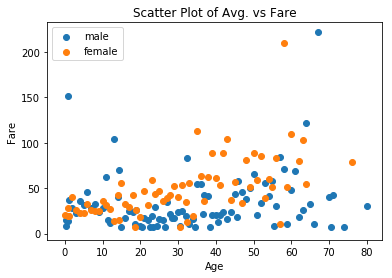

In [5]:
#2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

grp = titanic.groupby(["age", "sex"])
grp_unstack = grp.mean()['fare'].unstack()

d1 = grp_unstack.male.values
d2 = grp_unstack.female.values
d3 = grp_unstack.index.values

plt.scatter(d3, d1, label = 'male')
plt.scatter(d3, d2, label = 'female')

plt.title('Scatter Plot of Avg. vs Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.legend()